In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

### Total no. of artifacts in dataset

In [2]:
DATASET_NAME = 'dataset-depthmap-Test-2021-09-23-06-51-01'
DATASET_PATH = Path(f'/mnt/datasets/{DATASET_NAME}')

In [3]:
SAMPLE_PICKLE_PATH = 'scans/a5a13f20-0d22-11ec-985b-afa08904acb4/100/pc_a5c5de20-0d22-11ec-985b-d77b74c8d105_2021-09-04-01-51-37-259763_100_1.0.p'
!ls /mnt/datasets/{DATASET_NAME}/{SAMPLE_PICKLE_PATH}

/mnt/datasets/dataset-depthmap-Test-2021-09-23-06-51-01/scans/a5a13f20-0d22-11ec-985b-afa08904acb4/100/pc_a5c5de20-0d22-11ec-985b-d77b74c8d105_2021-09-04-01-51-37-259763_100_1.0.p


In [4]:
!du /mnt/datasets/{DATASET_NAME} -sh --apparent-size

14G	/mnt/datasets/dataset-depthmap-Test-2021-09-23-06-51-01


In [5]:
# Check resolution of depthmap
for fpath_pickle in tqdm(DATASET_PATH.glob('**/*.p')):
    depthmap, targets = pickle.load(open(fpath_pickle, "rb"))
    assert depthmap.shape == (240, 180, 1), fpath_pickle

83996it [50:14, 27.86it/s]


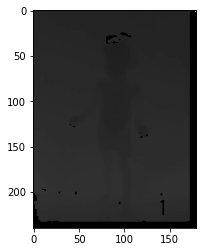

In [4]:
paths  = DATASET_PATH / SAMPLE_PICKLE_PATH
depthmap, targets = pickle.load(open(paths, "rb"))
_ = plt.imshow(np.squeeze(depthmap), cmap='gray')
plt.show()

In [5]:
print("targets: ", targets)
print("depthmap.shape: ", depthmap.shape)

targets:  {'file_path': '1630720297241/5303e5d7-ab15-4844-be4f-882d803fc958', 'timestamp': '2021-09-04-01-51-37-259763', 'scan_id': 'a5c5de20-0d22-11ec-985b-d77b74c8d105', 'scan_step': 100, 'scan_version': 'v0.8', 'height': 83.9, 'weight': 11.0, 'muac': 13.4, 'order_number': 1.0, 'format': 'depth', 'device_model': 'HUAWEI VOG-L29', 'person_id': 'a5a13f20-0d22-11ec-985b-afa08904acb4', 'age': 1053, 'sex': 'female', 'device_pose': [-0.31908831434969853, -0.9477050540292992, 0.006146398359303739, 0.0, -0.025789361321295275, 0.015165826872019585, 0.9995523530750792, 0.0, -0.9473740319895345, 0.318786963758889, -0.02927994619669133, 0.0, -0.012341336, 0.02795095, 0.024345726, 1.0], 'raw_header': '240x180_0.001_7_-0.41684103_0.5838523_0.56450033_-0.40828836_0.012341336_-0.02795095_-0.024345726', 'angle': -18.589581452777992}
depthmap.shape:  (240, 180, 1)


In [40]:
!head /mnt/datasets/{DATASET_NAME}/labels.csv

file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,Years
1630058467475/6d427c2d-baa7-46f3-9273-9271d5e4de06,2021-08-27-10-01-07-477684,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,1.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
1630058467589/cc80b854-003e-4e42-8bbb-8a014ddbf9a0,2021-08-27-10-01-07-602615,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,2.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
1630058467753/8839333b-5f1c-43b3-9e07-43ec43d8485b,2021-08-27-10-01-07-758936,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,3.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
1630058467877/8741b519-af45-4fa8-9f81-c6b98d9fadf6,2021-08-27-10-01-07-883934,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,4.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
1630058468009/2e1fc98

In [112]:
artifacts = pd.read_csv(DATASET_PATH / 'labels.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 83996


,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,Years
0,1630058467475/6d427c2d-baa7-46f3-9273-9271d5e4...,2021-08-27-10-01-07-477684,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,1.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
1,1630058467589/cc80b854-003e-4e42-8bbb-8a014ddb...,2021-08-27-10-01-07-602615,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,2.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
2,1630058467753/8839333b-5f1c-43b3-9e07-43ec43d8...,2021-08-27-10-01-07-758936,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,3.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
3,1630058467877/8741b519-af45-4fa8-9f81-c6b98d9f...,2021-08-27-10-01-07-883934,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,4.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
4,1630058468009/2e1fc988-7954-4876-987a-3b459f83...,2021-08-27-10-01-08-024562,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,5.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1


In [113]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,file_path,timestamp,scan_id,scan_step,scan_version,height,weight,muac,order_number,format,device_model,person_id,age,sex,Years
0,1630058467475/6d427c2d-baa7-46f3-9273-9271d5e4...,2021-08-27-10-01-07-477684,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,1.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
1,1630058467589/cc80b854-003e-4e42-8bbb-8a014ddb...,2021-08-27-10-01-07-602615,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,2.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
2,1630058467753/8839333b-5f1c-43b3-9e07-43ec43d8...,2021-08-27-10-01-07-758936,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,3.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
3,1630058467877/8741b519-af45-4fa8-9f81-c6b98d9f...,2021-08-27-10-01-07-883934,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,4.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1
4,1630058468009/2e1fc988-7954-4876-987a-3b459f83...,2021-08-27-10-01-08-024562,bcfbb021-071d-11ec-abef-ab4c22b77423,201,v0.9,87.1,11.75,14.2,5.0,depth,HUAWEI VOG-L29,bcf8a2e0-071d-11ec-abef-9ff1a2ab0682,700,male,1


### Total no. of children in the dataset

In [114]:
print("Total no. of artifacts:", len(artifacts))
unique_scan_ids = artifacts.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = artifacts.drop_duplicates(subset='person_id', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 83996
Total no. of unique scan ids: 5674
Total no. of unique person ids: 1868


HUAWEI VOG-L29    83996
Name: device_model, dtype: int64


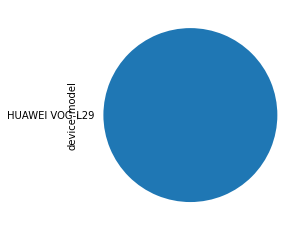

In [115]:
print(artifacts['device_model'].value_counts())
_ = artifacts['device_model'].value_counts().plot(kind='pie')

v0.8      77915
v0.9       5861
v1.0.2      220
Name: scan_version, dtype: int64


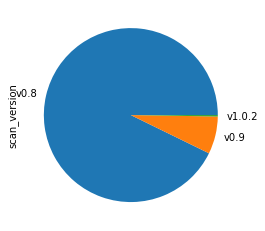

In [116]:
print(artifacts['scan_version'].value_counts())
_ = artifacts['scan_version'].value_counts().plot(kind='pie')

0    184
1    387
2    418
3    415
4    457
5      7
Name: Years, dtype: int64


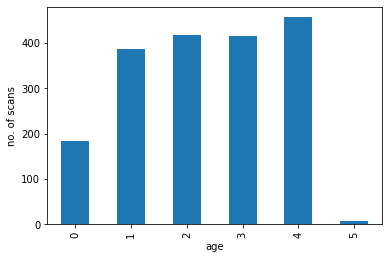

In [117]:
draw_age_distribution(unique_person_ids)

0     555
1    1166
2    1259
3    1283
4    1390
5      21
Name: Years, dtype: int64


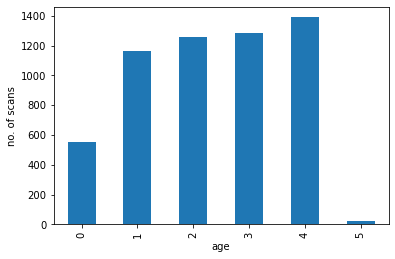

In [118]:
draw_age_distribution(unique_scan_ids)

101    37100
102    12825
100    12812
201    12683
202     4302
200     4274
Name: scan_step, dtype: int64


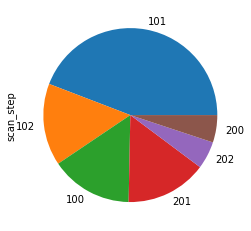

In [119]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['scan_step'].value_counts())
_ = artifacts['scan_step'].value_counts().plot(kind='pie')

In [120]:
scan_type_colname = 'scan_step' # for other datasets this can be "key"
calculate_code_age_distribution(artifacts, scan_type_colname)

2021-09-24 07:57:17,186 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/pksingh/code/Users/pksingh/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
201,4728,7149,546,260,0
202,1602,2421,189,90,0
200,1596,2402,188,88,0
102,72,1107,3592,3815,4176
100,71,1123,3623,3751,4181
101,208,3120,10422,10998,12170


In [121]:
calculate_code_age_distribution(unique_scan_ids, scan_type_colname)

2021-09-24 07:57:21,226 - INFO - scan_step - /mnt/batch/tasks/shared/LS_root/mounts/clusters/pksingh/code/Users/pksingh/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
201,176,265,21,10,0
202,177,267,21,10,0
200,178,268,21,10,0
102,8,122,399,418,463
100,8,124,400,418,464
101,8,120,397,417,463


### Distribution of height, weight and age against each other

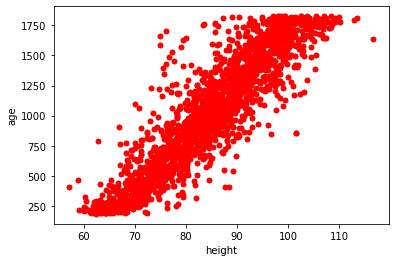

In [122]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height', y='age', c='red')


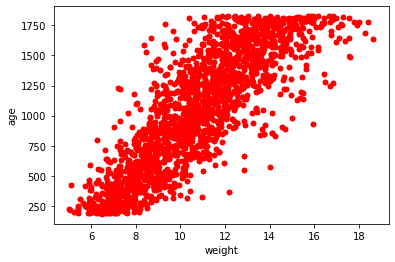

In [123]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight', y='age', c='red')

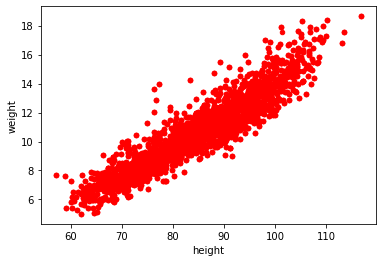

In [124]:
## distribution of height against weight
weight_vs_height = unique_scan_ids.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [125]:
artifacts.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,83996.000000,83996.000000,83996.000000,83996.000000,83996.000000,83996.000000,83996.000000
mean,126.310027,84.926718,10.730628,13.850599,10.487166,1039.378923,2.322682
std,43.483938,11.276285,2.554152,1.024268,9.057951,477.891191,1.316447
min,100.000000,57.100000,5.000000,10.600000,1.000000,184.000000,0.000000
25%,101.000000,76.200000,8.750000,13.200000,4.000000,634.000000,1.000000
50%,101.000000,85.300000,10.650000,13.700000,8.000000,1052.000000,2.000000
75%,200.000000,93.700000,12.500000,14.500000,16.000000,1457.000000,3.000000
max,202.000000,116.700000,18.650000,18.200000,145.000000,1825.000000,5.000000


In [126]:
unique_scan_ids.describe()

,scan_step,height,weight,muac,order_number,age,Years
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,126.095876,84.964188,10.744184,13.852432,1.023793,1040.863588,2.326049
std,43.368414,11.275271,2.554221,1.027240,0.466352,477.367798,1.315329
min,100.000000,57.100000,5.000000,10.600000,1.000000,184.000000,0.000000
25%,100.000000,76.200000,8.750000,13.200000,1.000000,638.000000,1.000000
50%,102.000000,85.400000,10.650000,13.800000,1.000000,1053.000000,2.000000
75%,200.000000,93.800000,12.550000,14.500000,1.000000,1457.000000,3.000000
max,202.000000,116.700000,18.650000,18.200000,25.000000,1825.000000,5.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [127]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='person_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [128]:
find_outliers(artifacts, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [129]:
find_outliers(artifacts, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [130]:
find_outliers(artifacts, 'weight', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight<5.0
No. of outliers: 0


[]

In [131]:
find_outliers(artifacts, 'weight', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight>30.0
No. of outliers: 0


[]

### 3) Check height

In [132]:
find_outliers(artifacts, 'height', '<40.0', data_id_name='scan_id')

Running the following query: @df.height<40.0
No. of outliers: 0


[]

In [133]:
find_outliers(artifacts, 'height', '>150.0', data_id_name='scan_id')

Running the following query: @df.height>150.0
No. of outliers: 0


[]